In [138]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
from scipy.stats import norm, skew
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [95]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [96]:
test_id = test['Id']

In [97]:
train.drop('Id', 1, inplace=True)
test.drop('Id', 1, inplace=True)

In [98]:
train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [99]:
corr = train.corr()

In [100]:
most_corr = corr.nlargest(12, 'SalePrice')['SalePrice']

In [101]:
test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


<AxesSubplot:>

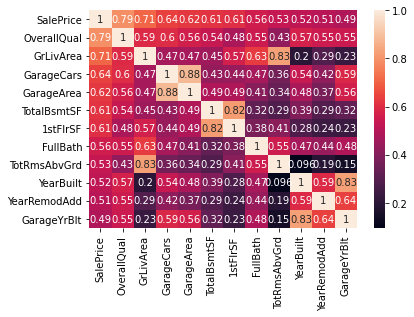

In [102]:
sns.heatmap(train[list(most_corr.index)].corr(), annot=True)

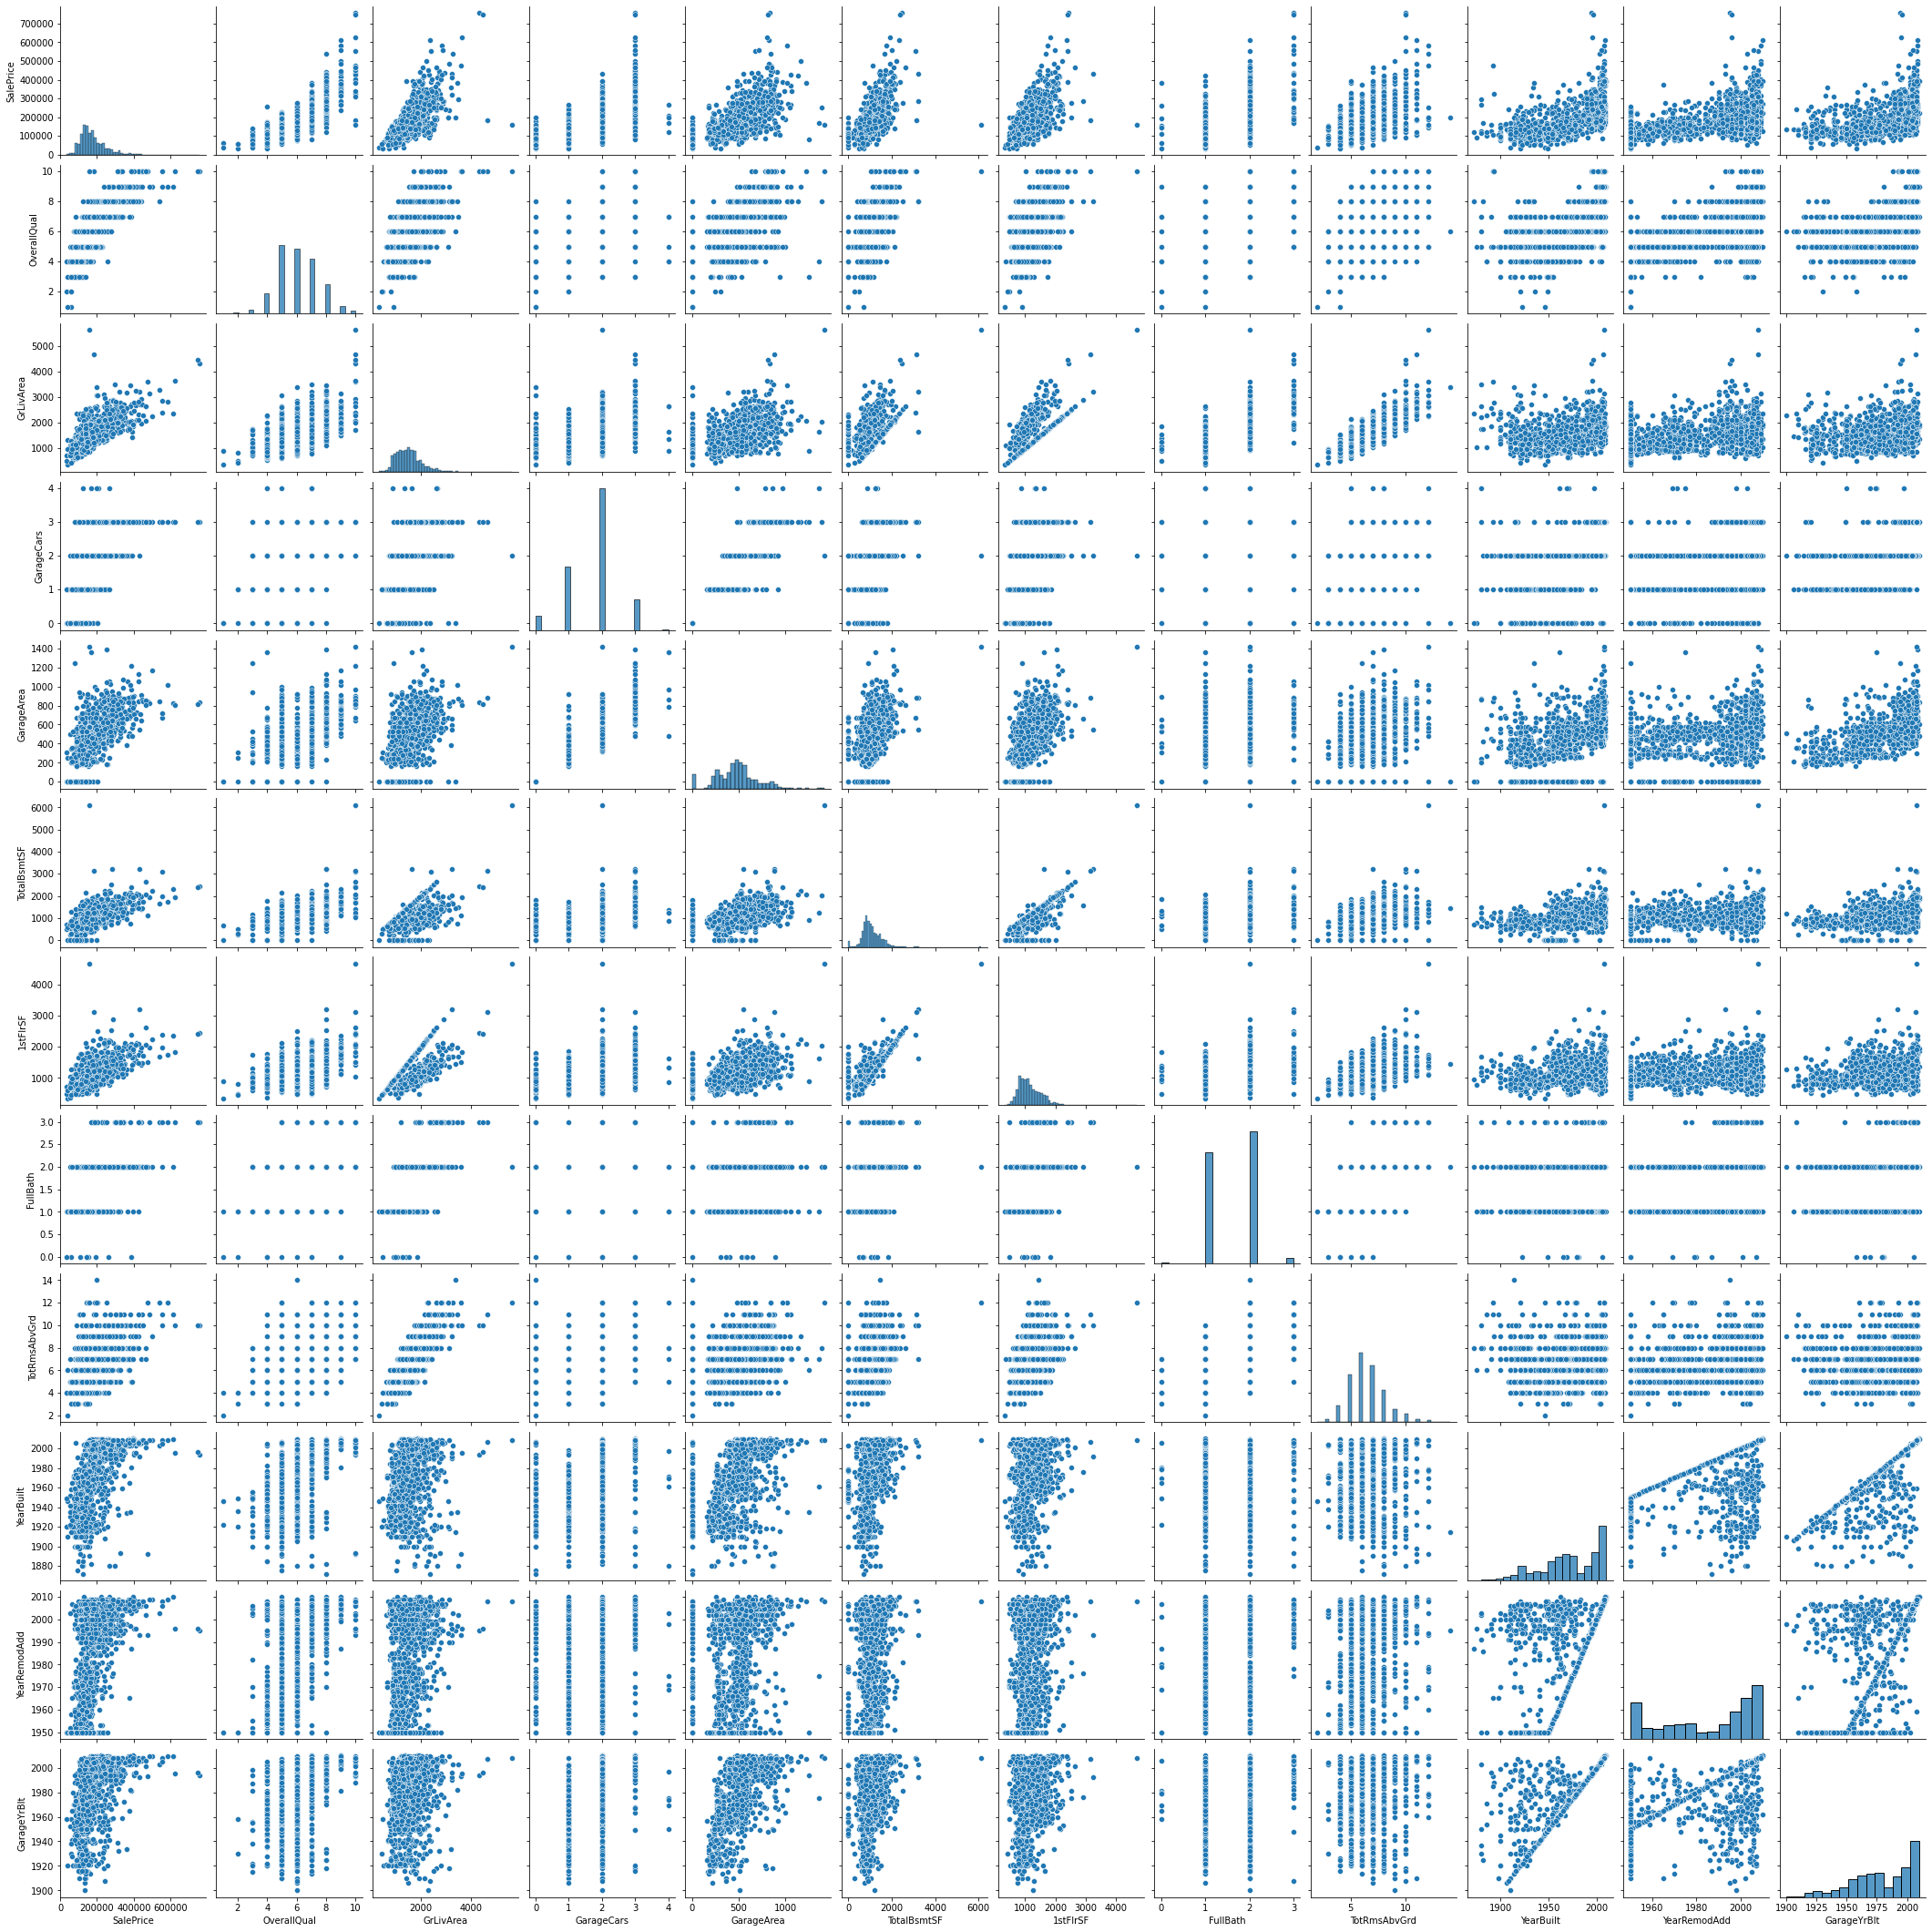

In [103]:
sns.pairplot(train[list(most_corr.index)])

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SalePrice', ylabel='TotalBsmtSF'>

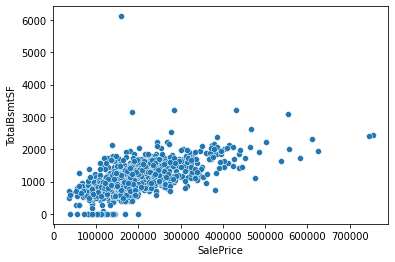

In [104]:
sns.scatterplot(train['SalePrice'], train['TotalBsmtSF'])

In [105]:
train.drop(train[train['TotalBsmtSF'] > 5000].index, inplace=True)

In [106]:
data = pd.concat([train, test])

In [107]:
y = train['SalePrice'].values
data.drop('SalePrice', 1, inplace=True)

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

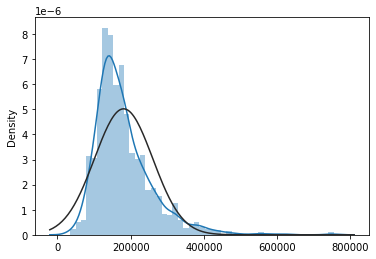

In [108]:
sns.distplot(y, fit=norm)

In [109]:
print(train['SalePrice'].skew(), train['SalePrice'].kurt())

1.8818369241082715 6.52930587400458


In [110]:
y_log = np.log1p(y)

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

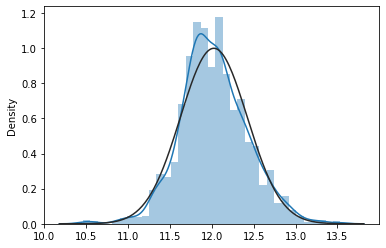

In [112]:
sns.distplot(y_log, fit=norm)

In [113]:
na = data.isnull().sum()
nap = data.isnull().sum() * 100 / len(data)

In [114]:
df_nan = pd.DataFrame({'nan_count': na, 'nan%': nap}, index=na.index).sort_values(by='nan%', ascending=False)

In [115]:
df_nan.iloc[:40]

,nan_count,nan%
PoolQC,2909,99.691570
MiscFeature,2813,96.401645
Alley,2720,93.214531
Fence,2347,80.431803
FireplaceQu,1420,48.663468
LotFrontage,486,16.655243
GarageYrBlt,159,5.448938
GarageFinish,159,5.448938
GarageQual,159,5.448938
GarageCond,159,5.448938


In [116]:
data.drop(df_nan[df_nan['nan%'] > 16].index, 1, inplace=True)

In [117]:
for i in df_nan[df_nan['nan%'] < 16].index:
    if data[i].dtypes == 'object':
        data[i].fillna(data[i].mode()[0], inplace=True)
    else:
        data[i].fillna(data[i].mean(), inplace=True)

In [118]:
data.isna().sum().sum()

0

In [119]:
data

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,61,0,0,0,0,0,2,2008,WD,Normal
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,0,5,2007,WD,Normal
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,42,0,0,0,0,0,9,2008,WD,Normal
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,84,0,0,0,0,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,...,0,0,0,0,0,0,6,2006,WD,Normal
1455,160,RM,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,...,24,0,0,0,0,0,4,2006,WD,Abnorml
1456,20,RL,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,...,0,0,0,0,0,0,9,2006,WD,Abnorml
1457,85,RL,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,...,32,0,0,0,0,700,7,2006,WD,Normal


In [120]:
data.dtypes

MSSubClass        int64
MSZoning         object
LotArea           int64
Street           object
LotShape         object
                  ...  
MiscVal           int64
MoSold            int64
YrSold            int64
SaleType         object
SaleCondition    object
Length: 73, dtype: object

In [121]:
numeric_feats = data.dtypes[data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = data[numeric_feats].apply(lambda x: skew(x)).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.943434
PoolArea,17.691725
LotArea,13.028401
LowQualFinSF,12.086650
3SsnPorch,11.374072
KitchenAbvGr,4.301402
BsmtFinSF2,4.145214
EnclosedPorch,4.003118
ScreenPorch,3.945898
BsmtHalfBath,3.930544


In [122]:
skewness = skewness[skewness > 0.75]
skewed_features = skewness.index
for feat in skewed_features:
    data[feat] = np.log1p(data[feat])


In [123]:
all_data = pd.get_dummies(data)

In [124]:
all_data

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.110874,9.042040,2.079442,1.791759,7.602900,7.602900,5.283204,6.561031,0.0,5.017280,...,0,0,0,1,0,0,0,0,1,0
1,3.044522,9.169623,1.945910,2.197225,7.589336,7.589336,0.000000,6.886532,0.0,5.652489,...,0,0,0,1,0,0,0,0,1,0
2,4.110874,9.328212,2.079442,1.791759,7.601902,7.602401,5.093750,6.188264,0.0,6.075346,...,0,0,0,1,0,0,0,0,1,0
3,4.262680,9.164401,2.079442,1.791759,7.557995,7.586296,0.000000,5.379897,0.0,6.293419,...,0,0,0,1,1,0,0,0,0,0
4,4.110874,9.565284,2.197225,1.791759,7.601402,7.601402,5.860786,6.486161,0.0,6.196444,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,5.081404,7.568896,1.609438,2.079442,7.586296,7.586296,0.000000,0.000000,0.0,6.304449,...,0,0,0,1,0,0,0,0,1,0
1455,5.081404,7.546974,1.609438,1.791759,7.586296,7.586296,0.000000,5.533389,0.0,5.686975,...,0,0,0,1,1,0,0,0,0,0
1456,3.044522,9.903538,1.791759,2.079442,7.581210,7.599401,0.000000,7.110696,0.0,0.000000,...,0,0,0,1,1,0,0,0,0,0
1457,4.454347,9.253591,1.791759,1.791759,7.597396,7.597396,0.000000,5.823046,0.0,6.356108,...,0,0,0,1,0,0,0,0,1,0


In [125]:
train.shape, test.shape

((1459, 80), (1459, 79))

In [126]:
train1 = all_data[:train.shape[0]]
test1 = all_data[train.shape[0]:]

In [127]:
train1.describe()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,...,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,3.818594,9.109627,1.939995,1.869319,7.586809,7.593748,2.142549,4.226709,0.655847,5.648036,...,0.003427,0.082934,0.002056,0.868403,0.069225,0.002742,0.008225,0.013708,0.821110,0.084990
std,0.688547,0.515009,0.201696,0.168446,0.015387,0.010423,2.628758,2.990849,1.845597,1.854610,...,0.058460,0.275876,0.045314,0.338168,0.253924,0.052306,0.090348,0.116316,0.383391,0.278962
min,3.044522,7.170888,0.693147,0.693147,7.535297,7.576097,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.044522,8.929302,1.791759,1.791759,7.578145,7.584773,0.000000,0.000000,0.000000,5.411646,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,3.931826,9.156729,1.945910,1.791759,7.587817,7.598399,0.000000,5.950643,0.000000,6.173786,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,4.262680,9.358847,2.079442,1.945910,7.601402,7.603399,5.105945,6.569481,0.000000,6.695799,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,5.252273,12.279537,2.397895,2.302585,7.606387,7.606387,7.378384,7.723562,7.296413,7.756623,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [130]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_val_score

In [136]:
r = Ridge()
l = Lasso()
clfs = [r, l]

In [140]:
for clf in clfs:
    param = {'alpha': np.linspace(0, 20, 40)}
    grd = GridSearchCV(clf, param, scoring='neg_root_mean_squared_error', cv=5)
    grd.fit(train1, y_log)
    print(clf, grd.best_params_, grd.best_score_)

Ridge() {'alpha': 6.153846153846153} -0.12044796935489818
Lasso() {'alpha': 0.0} -0.13052837910814333


In [141]:
r = Ridge(alpha=6.15)
r.fit(train1, y_log)
preds = np.expm1(r.predict(test1))
print(preds)

[118425.08452954 162096.24261959 185933.12217077 ... 168005.02140479
 115618.16456983 210576.45698138]


In [142]:
df_test = pd.DataFrame({'Id': test_id, 'SalePrice': preds}).reset_index(drop=True)

In [143]:
df_test.to_csv('predss.csv', index=False)